In [3]:
import os
import shutil
import glob
import matplotlib.pyplot as plt
import pygal 
from IPython.display import display, HTML

In [8]:
train_data = "./data/data"

#Create function to display interactive plotting
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))
    
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Total Dataset Distribution'
for o in os.listdir(train_data):
    line_chart.add(o, len(os.listdir(os.path.join(train_data, o))))
galplot(line_chart)

In [9]:
#Confirm Folder Structure
for root, dirs, files in os.walk(train_data):
    level = root.replace(os.getcwd(), '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    for f in files[:2]:
        print('{0}{1}'.format('    ' * (level + 1), f))
    if level is not 0:
        print('{0}{1}'.format('    ' * (level + 1), "..."))    

        data/
            ...
            03/
                exp43781.jpg
                exp14801.jpg
                ...
            04/
                exp27213.jpg
                exp66529.jpg
                ...
            05/
                exp52854.jpg
                exp932.jpg
                ...
            02/
                2_88717.jpg
                2_15146.jpg
                ...
            R/
                exp33266.jpg
                exp45496.jpg
                ...
            u/
                u_54065.jpg
                exp76048.jpg
                ...
            0/
                0_7861.jpg
                exp60158.jpg
                ...
            i/
                exp47281.jpg
                exp65752.jpg
                ...
            N/
                n_31797.jpg
                exp88396.jpg
                ...
            G/
                exp71733.jpg
                g_55068.jpg
                ...
            z/
                exp5415.jpg
  

In [10]:
import math
import re
import sys

#Train and Test Set Variables
train_val_test_ratio = (.7,.15,.15) # 70/15/15 Data Split
test_folder = './data/test/'
train_folder = './data/train/'
val_folder = './data/val/'

file_names = os.listdir('./data/data')

#Remove Existing Folders if they exist
for folder in [test_folder, train_folder, val_folder]:
    if os.path.exists(folder) and os.path.isdir(folder):
        shutil.rmtree(folder)

#Remake Category Folders in both Train and Test Folders
for category in file_names:
    os.makedirs(test_folder + category)
    os.makedirs(train_folder + category)
    os.makedirs(val_folder + category)

#Split Data by Train Ratio and copy files to correct directory
for idx, category in enumerate(file_names):
    file_list = os.listdir(train_data + '/' + category)
    
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio = math.floor(len(file_list) * train_val_test_ratio[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = file_list[train_ratio + val_ratio:]
    
    for i, file in enumerate(train_list):
        shutil.copy(train_data + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s train images to category folder %s' % (len(train_list), category))  
    sys.stdout.write('\n')
    for i, file in enumerate(val_list):
        shutil.copy(train_data + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s validation images to category folder %s' % (len(val_list), category))                   
    sys.stdout.write('\n')
    for i, file in enumerate(test_list):
        shutil.copy(train_data + '/' + category + '/' + file, test_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s test images to category folder %s' % (len(test_list), category))
    sys.stdout.write('\n')
    
print("Done.")  

Moving 7636 train images to category folder 03
Moving 1636 validation images to category folder 03
Moving 1637 test images to category folder 03
Moving 5177 train images to category folder 04
Moving 1109 validation images to category folder 04
Moving 1110 test images to category folder 04
Moving 2481 train images to category folder 05
Moving 531 validation images to category folder 05
Moving 533 test images to category folder 05
Moving 18298 train images to category folder 02
Moving 3921 validation images to category folder 02
Moving 3922 test images to category folder 02
Moving 1869 train images to category folder R
Moving 400 validation images to category folder R
Moving 402 test images to category folder R
Moving 888 train images to category folder u
Moving 190 validation images to category folder u
Moving 191 test images to category folder u
Moving 4839 train images to category folder 0
Moving 1037 validation images to category folder 0
Moving 1038 test images to category folder 0


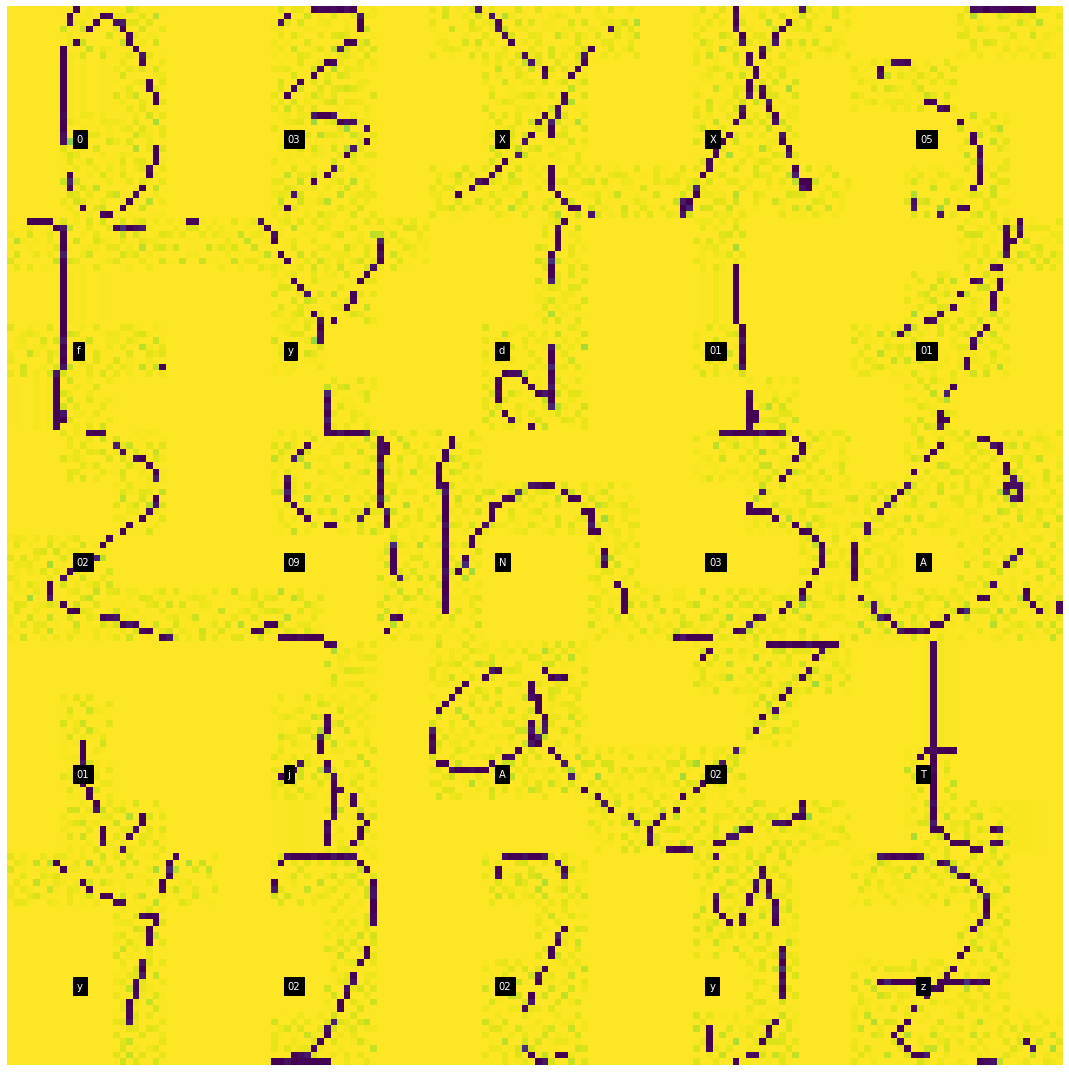

In [12]:
import vmmr_utils
from functools import partial
from multiprocessing import Pool

#Resize Images
if __name__ == '__main__':
    pool = Pool()
    image_list = glob.glob(train_folder + "/*/*")
    func = partial(vmmr_utils.resize_image, size=32)
    pool.map(func, image_list)
    pool.close()

vmmr_utils.display_images(train_folder)

In [13]:
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Training Class Distribution'
for o in os.listdir(train_folder):
    line_chart.add(o, len(os.listdir(os.path.join(train_folder, o))))
galplot(line_chart)  

In [15]:
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Test Class Distribution'
for o in os.listdir(test_folder):
    line_chart.add(o, len(os.listdir(os.path.join(test_folder, o))))
galplot(line_chart)  

In [17]:
import pygal 
#Compare class distribution
val_folder = './data/val/'
line_chart = pygal.Bar(height=300)
line_chart.title = 'Velidation Class Distribution'
for o in os.listdir(val_folder):
    line_chart.add(o, len(os.listdir(os.path.join(val_folder, o))))
galplot(line_chart)  

In [18]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input, decode_predictions

WIDTH=32
HEIGHT=32
BATCH_SIZE=128
test_dir = './data/test/'
train_dir = './data/train/'
val_dir = './data/val/'

#Train DataSet Generator with Augmentation
print("\nTraining Data Set")
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
train_flow = train_generator.flow_from_directory(
    train_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

#Validation DataSet Generator with Augmentation
print("\nValidation Data Set")
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_flow = val_generator.flow_from_directory(
    val_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

#Test DataSet Generator with Augmentation
print("\nTest Data Set")
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    test_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

Using TensorFlow backend.
/Users/apple/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/apple/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/apple/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/apple/anaconda3/lib/python3.7/site-packages/tenso


Training Data Set
Found 151749 images belonging to 36 classes.

Validation Data Set
Found 32507 images belonging to 36 classes.

Test Data Set
Found 32553 images belonging to 36 classes.


In [19]:
from __future__ import division, print_function, absolute_import
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Convolution2D, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [22]:
model = Sequential()

model.add(Convolution2D(64, kernel_size=3, activation='relu', input_shape=(WIDTH,HEIGHT,3)))
#model.add(Convolution2D(100, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('tanh'))

model.add(Convolution2D(250, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('tanh'))

model.add(Flatten())
model.add(Dense(1000))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(36))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
model.summary()

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(250, (5, 5), padding="valid")`
  


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
activation_5 (Activation)    (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 250)       400250    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 250)         0         
_________________________________________________________________
activation_6 (Activation)    (None, 5, 5, 250)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6250)             

In [23]:
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger
top_layers_file_path="model.h5"

checkpoint = ModelCheckpoint(top_layers_file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
tb = TensorBoard(log_dir='./logs', batch_size=val_flow.batch_size, write_graph=True, update_freq='batch')
early = EarlyStopping(monitor="loss", mode="min", patience=5)
csv_logger = CSVLogger('./logs/iv3-log.csv', append=True)

history = model.fit_generator(train_flow, 
                              epochs=12, 
                              verbose=1,
                              validation_data=val_flow,
                              validation_steps=math.ceil(val_flow.samples/val_flow.batch_size),
                              steps_per_epoch=math.ceil(train_flow.samples/train_flow.batch_size),
                              callbacks=[checkpoint, early, tb, csv_logger])

Epoch 1/12
   1/1186 [..............................] - ETA: 1:03:27 - loss: 3.5492 - accuracy: 0.1406WARNING:tensorflow:From /Users/apple/anaconda3/lib/python3.7/site-packages/keras/callbacks/tensorboard_v1.py:343: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.

1186/1186 [==============================] - 2766s 2s/step - loss: 0.6656 - accuracy: 0.8128 - val_loss: 0.3518 - val_accuracy: 0.9054

Epoch 00001: loss improved from inf to 0.66582, saving model to model.h5
Epoch 2/12
1186/1186 [==============================] - 2653s 2s/step - loss: 0.2321 - accuracy: 0.9295 - val_loss: 0.1571 - val_accuracy: 0.9667

Epoch 00002: loss improved from 0.66582 to 0.23214, saving model to model.h5
Epoch 3/12
1186/1186 [==============================] - 2313s 2s/step - loss: 0.1228 - accuracy: 0.9611 - val_loss: 0.0647 - val_accuracy: 0.9807

Epoch 00003: loss improved from 0.23214 to 0.12284, saving model to model.h5
Epoch 4/12
1186/1186 [============================

In [24]:
model.save('model.h5')
model.load_weights('model.h5')
loss, acc = model.evaluate_generator(
    test_flow,
    verbose = True,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))
print("Loss: ", loss)
print("Acc: ", acc)

255/255 [==============================] - 134s 524ms/step
Loss:  1.3667002349393442e-05
Acc:  0.9954228401184082


In [27]:
label = [k for k,v in train_flow.class_indices.items()]
with open('iv3-labels.txt', 'w+') as file:
    file.write("\n".join(label))

In [44]:
from keras.preprocessing import image
import numpy as np
import os
import glob
import random

import numpy as np
# import the monthly average values from `avg-monthly-precip.txt` as a numpy array
avg_monthly_precip = np.genfromtxt("iv3-labels.txt",dtype='str')
label=avg_monthly_precip
    
file_list = glob.glob("./data/test/*/*")
img_path = random.choice(file_list)
img_cat = os.path.split(os.path.dirname(img_path))[1]
print("Image Category: ", img_cat)
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
#print("Raw Predictions: ", preds)

top_x = 3
top_args = preds[0].argsort()[-top_x:][::-1]
preds_label = [label[p] for p in top_args]
print("\nTop " + str(top_x) + " confidence: " + " ".join(map(str, sorted(preds[0])[-top_x:][::-1])))
print("Top " + str(top_x) + " labels: " + " ".join(map(str, preds_label)))

number=preds_label[0]
#loop through csv list
with open("labels.csv") as f:
    for l, i in enumerate(f):
        data = i.split(",")
        if data[0] == number:
            print(data)

Image Category:  M

Top 3 confidence: 0.9999758 2.3668656e-05 4.896604e-07
Top 3 labels: M N w
['M', 'consonant', 'Character', '', '\n']


In [34]:
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras import backend as K
from keras import optimizers, models

top_layers_file_path="model.h5"
input_model_path = top_layers_file_path
output_model_name = "top_layers.iv3.pb"
output_model_dir = "tf_model"

K.set_learning_phase(0)
sess = K.get_session()

test_model = models.load_model(input_model_path)
orig_output_node_names = [node.op.name for node in test_model.outputs]

constant_graph = graph_util.convert_variables_to_constants(
    sess,
    sess.graph.as_graph_def(),
    orig_output_node_names)
graph_io.write_graph(
    constant_graph,
    output_model_dir,
    output_model_name,
    as_text=False)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


'tf_model/top_layers.iv3.pb'

In [35]:
from keras.models import load_model
model = load_model('model.h5')

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
#Test DataSet Generator with Augmentation
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    './data/test',
    shuffle=False,
    target_size=(32, 32),
    batch_size = 32
)

Found 32553 images belonging to 36 classes.


In [36]:
import math
import numpy as np
predictions = model.predict_generator(
    test_flow,
    verbose=1,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())  

1018/1018 [==============================] - 170s 167ms/step


In [37]:
label = [k for k,v in train_flow.class_indices.items()]
with open('iv3-labels.txt', 'w+') as file:
    file.write("\n".join(label))

In [38]:
from keras.preprocessing import image
import numpy as np
import glob
import os
from keras import models
from keras.applications.inception_v3 import preprocess_input
import random

file_list = glob.glob("./data/test/*/*")
img_path = random.choice(file_list)
img_cat = os.path.split(os.path.dirname(img_path))[1]
print("Image Category: ", img_cat)
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print("Raw Predictions: ", preds)

top_x = 3
top_args = preds[0].argsort()[-top_x:][::-1]
preds_label = [label[p] for p in top_args]
print("\nTop " + str(top_x) + " confidence: " + " ".join(map(str, sorted(preds[0])[-top_x:][::-1])))
print("Top " + str(top_x) + " labels: " + " ".join(map(str, preds_label)))

number=preds_label[0]
#loop through csv list
with open("labels.csv") as f:
    for l, i in enumerate(f):
        data = i.split(",")
        if data[0] == number:
            print(data)

Image Category:  01
Raw Predictions:  [[1.6739382e-07 9.9950242e-01 2.1216252e-07 1.1963547e-08 1.2681913e-06
  6.9148534e-08 1.4463232e-07 9.1712047e-07 9.3451899e-07 1.3759392e-06
  1.0841286e-07 1.2910649e-06 3.9738744e-08 8.0323974e-07 1.6387332e-07
  1.9132806e-07 1.9909470e-07 1.1041625e-07 3.1379325e-04 2.1474644e-08
  2.4130529e-06 2.5931260e-07 8.4156977e-07 5.9193226e-06 3.0245703e-05
  7.8015061e-09 5.6654528e-07 1.3257352e-04 4.1077936e-07 4.6264955e-07
  3.8932109e-07 2.7370277e-07 5.7166545e-07 2.1826982e-07 5.9795866e-07
  2.4717293e-09]]

Top 3 confidence: 0.9995024 0.00031379325 0.00013257352
Top 3 labels: 01 T l
['01', 'one', 'Digit', '', '\n']


0 : 0
1 : 01
2 : 02
3 : 03
4 : 04
5 : 05
6 : 06
7 : 07
8 : 08
9 : 09
10 : A
11 : C
12 : G
13 : H
14 : M
15 : N
16 : R
17 : S
18 : T
19 : X
20 : b
21 : d
22 : e
23 : f
24 : i
25 : j
26 : k
27 : l
28 : o
29 : p
30 : q
31 : u
32 : v
33 : w
34 : y
35 : z


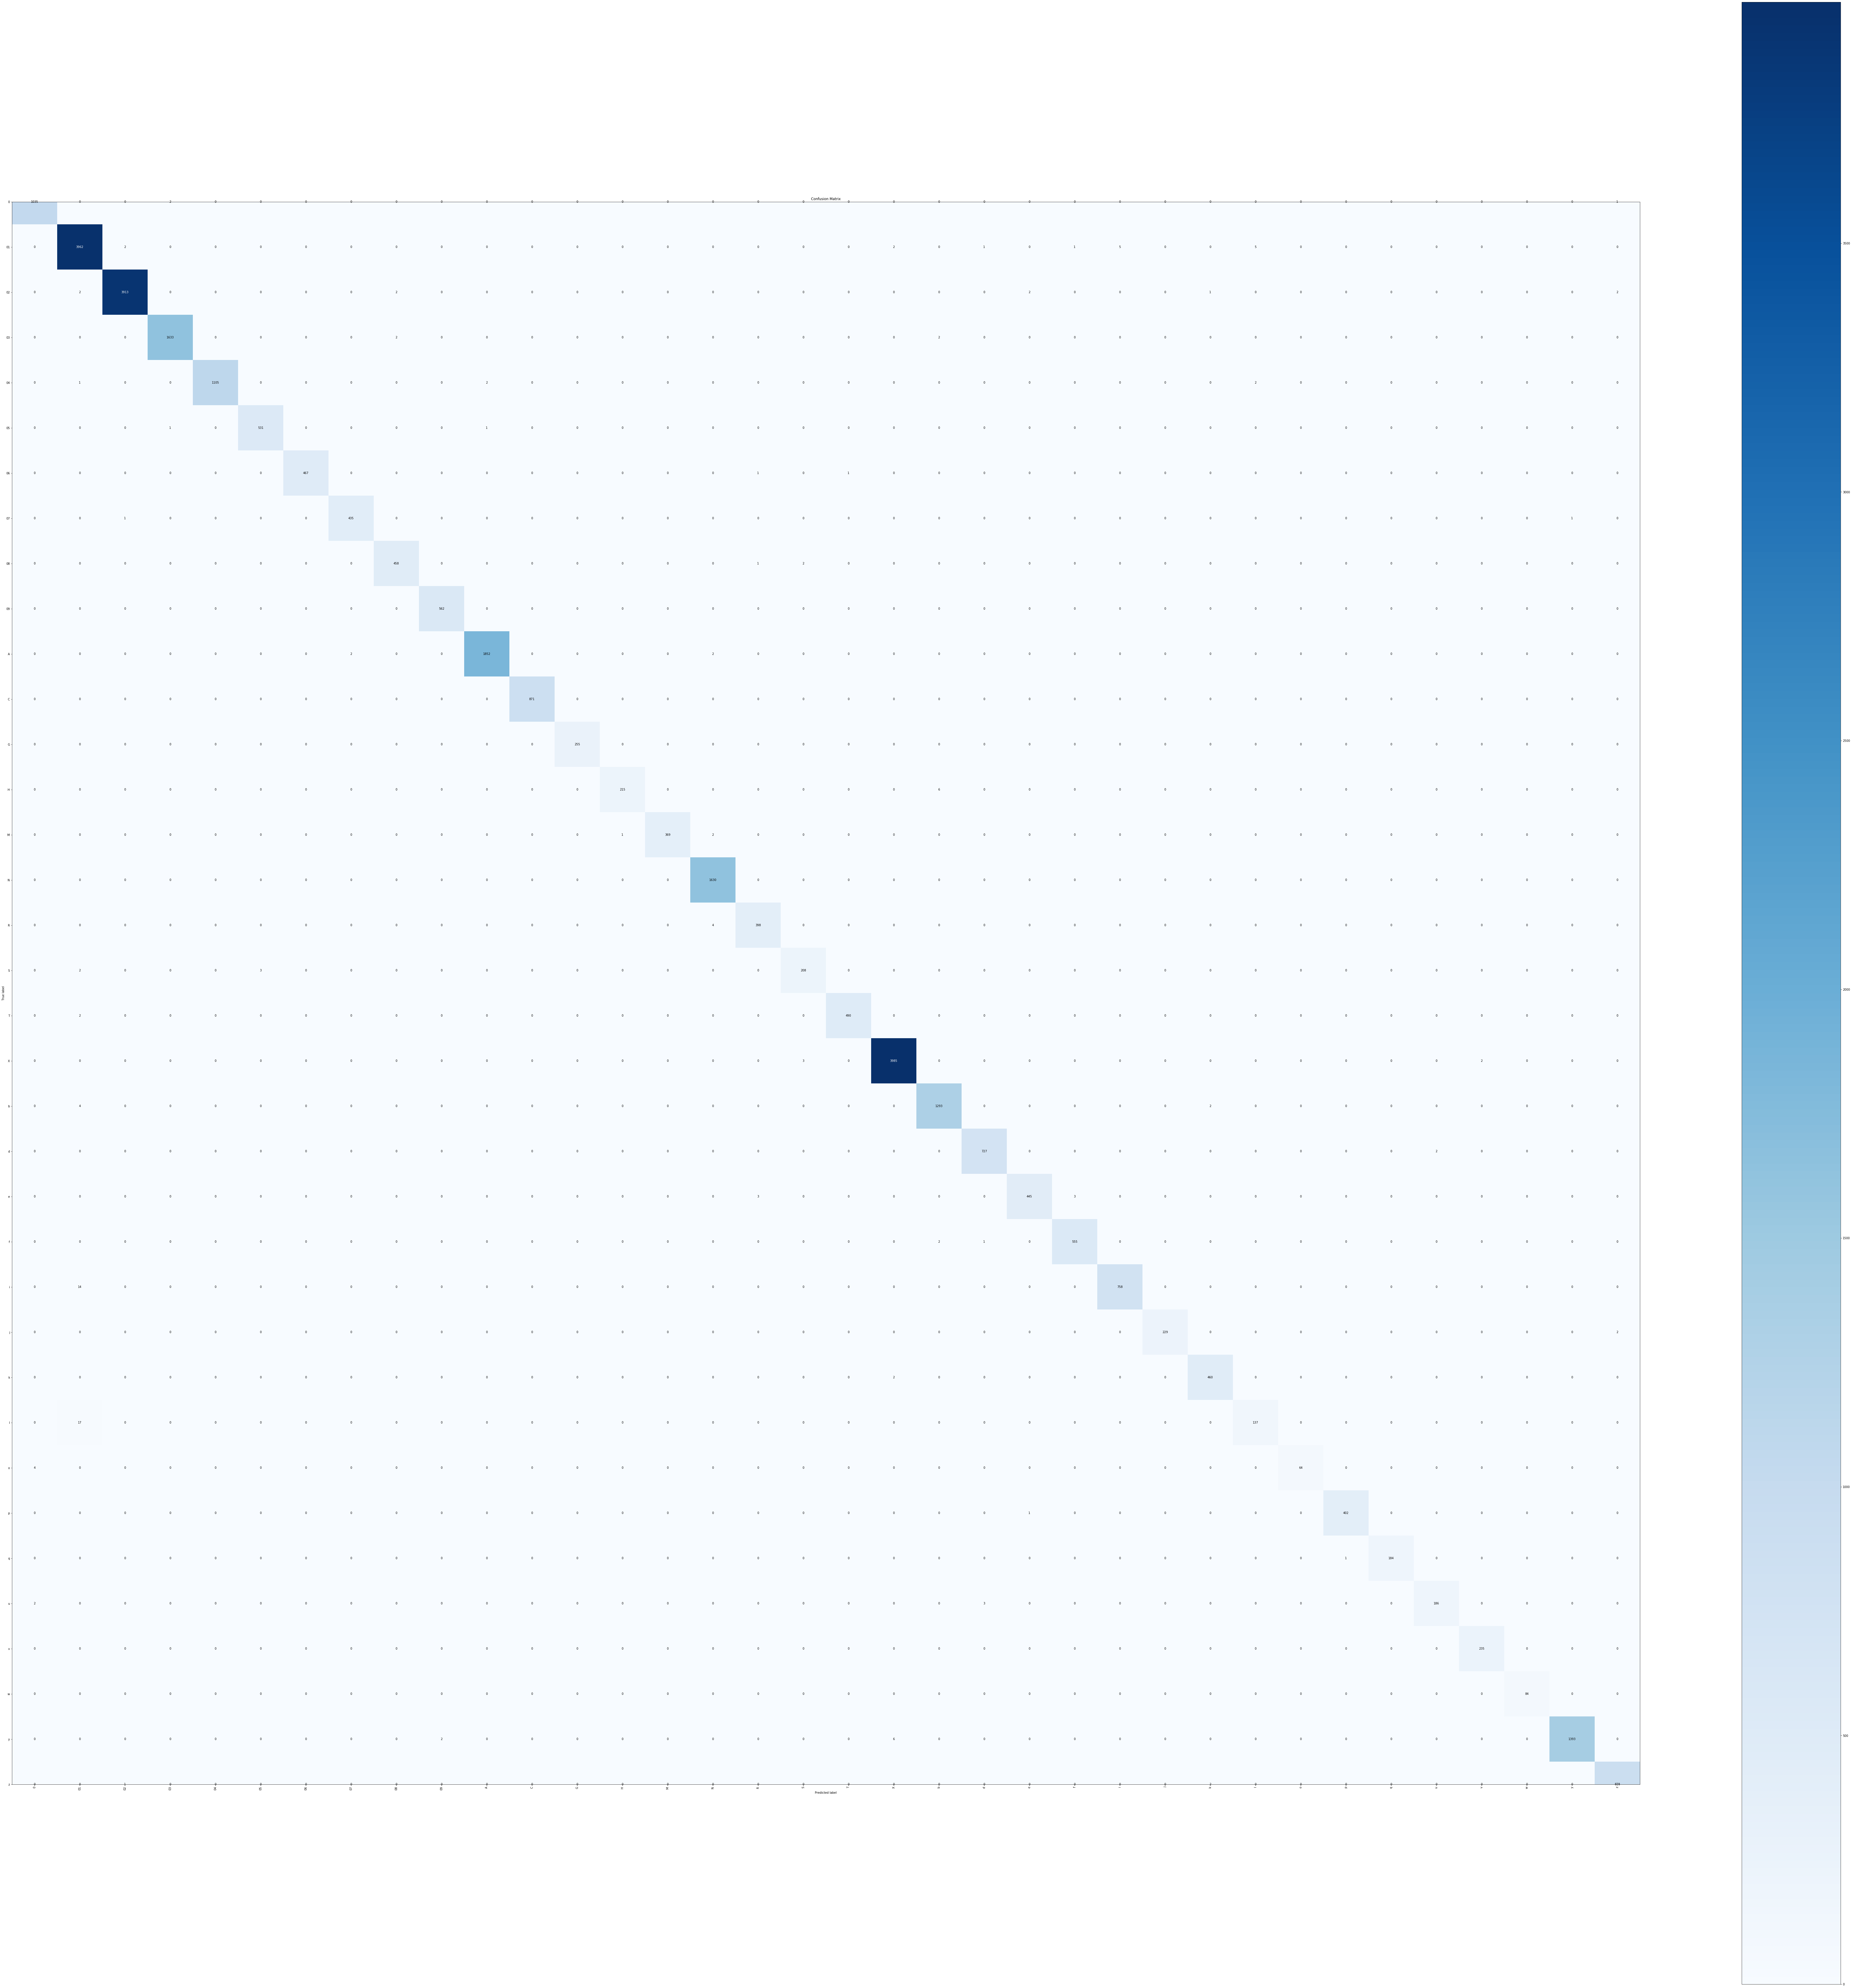

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline  
import scikitplot as skplt

[print(k, ":", v) for k,v in enumerate(class_labels)]
true_map_classes = [class_labels[x] for x in true_classes]
predicted_map_classes = [class_labels[x] for x in predicted_classes]

skplt.metrics.plot_confusion_matrix(
    true_map_classes, 
    predicted_map_classes,
    labels=class_labels,
    x_tick_rotation=90,
    figsize=(125,125))

In [40]:
from sklearn.metrics import classification_report
report = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1038
          01       0.99      1.00      0.99      3978
          02       1.00      1.00      1.00      3922
          03       1.00      1.00      1.00      1637
          04       1.00      1.00      1.00      1110
          05       0.99      1.00      1.00       533
          06       1.00      1.00      1.00       469
          07       1.00      1.00      1.00       437
          08       0.99      0.99      0.99       461
          09       1.00      1.00      1.00       562
           A       1.00      1.00      1.00      1856
           C       1.00      1.00      1.00       871
           G       1.00      1.00      1.00       255
           H       1.00      0.97      0.98       221
           M       1.00      0.99      1.00       372
           N       1.00      1.00      1.00      1630
           R       0.99      0.99      0.99       402
           S       0.98    

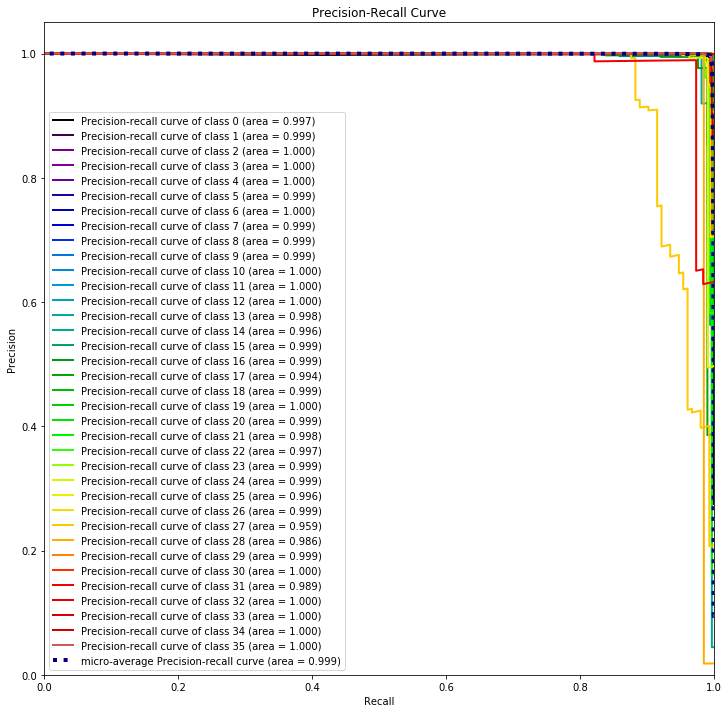

In [41]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(
    true_classes,
    predictions,
    figsize=(12,12))

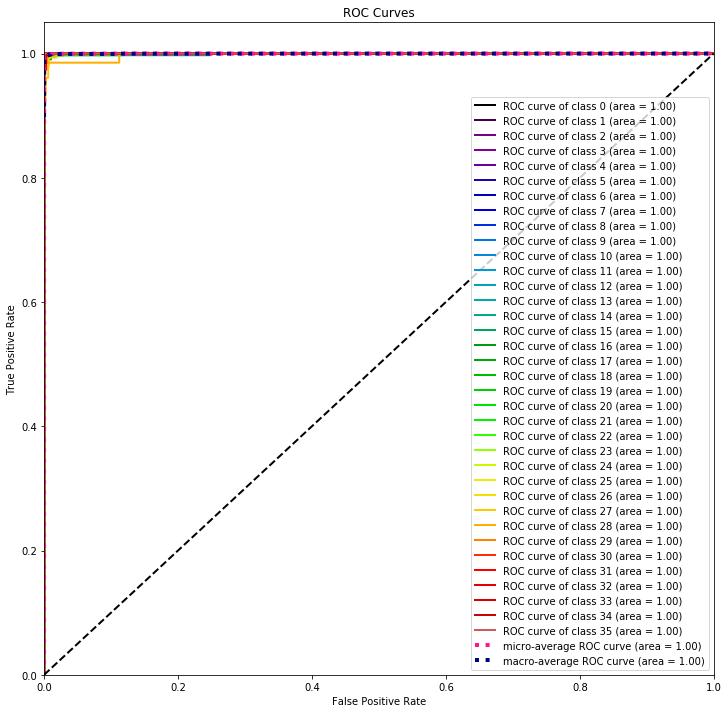

In [42]:
skplt.metrics.plot_roc(
    true_classes,
    predictions,
    figsize=(12,12))